# Exploratory Data Analysis (EDA)

This notebook explores the Rain in Australia dataset to understand:
- Class imbalance
- Feature distributions
- Relationship between features and rainfall

The goal is to gain insights before modeling.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [4]:
df = pd.read_csv("../data/weatherAUS.csv")
df.head()


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
print("Satır, sütun:", df.shape)
df.columns


Satır, sütun: (145460, 23)


Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='str')

In [6]:
df["RainTomorrow"].value_counts()


RainTomorrow
No     110316
Yes     31877
Name: count, dtype: int64

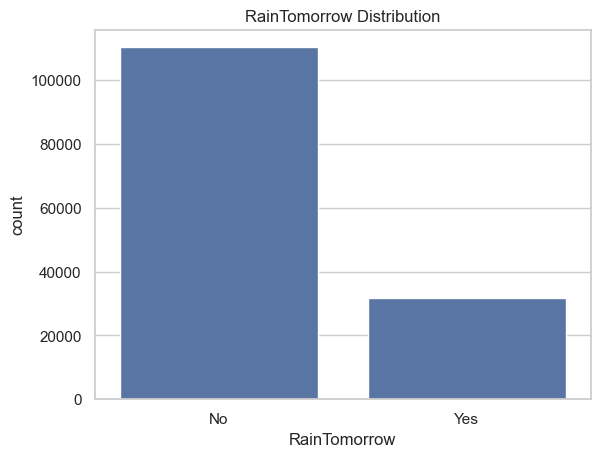

In [7]:
sns.countplot(x="RainTomorrow", data=df)
plt.title("RainTomorrow Distribution")
plt.show()

In [8]:
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
numeric_cols


Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='str')

In [9]:
df[numeric_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


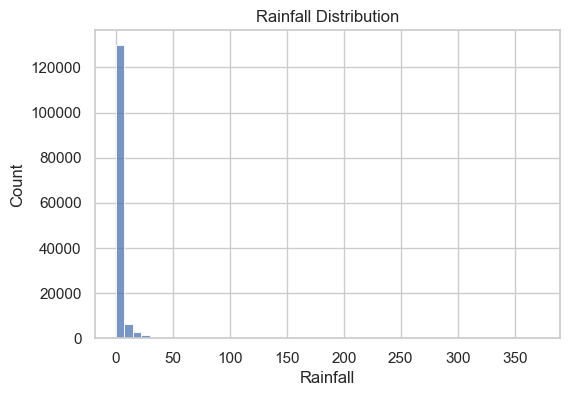

In [10]:
plt.figure(figsize=(6,4))
sns.histplot(df["Rainfall"], bins=50)
plt.title("Rainfall Distribution")
plt.show()


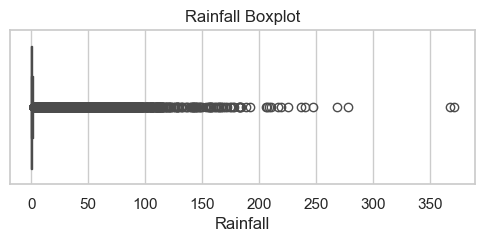

In [11]:
plt.figure(figsize=(6,2))
sns.boxplot(x=df["Rainfall"])
plt.title("Rainfall Boxplot")
plt.show()


Because the mean and the median differ significantly for the **Rainfall** feature,
median imputation is more robust and reliable than mean imputation.


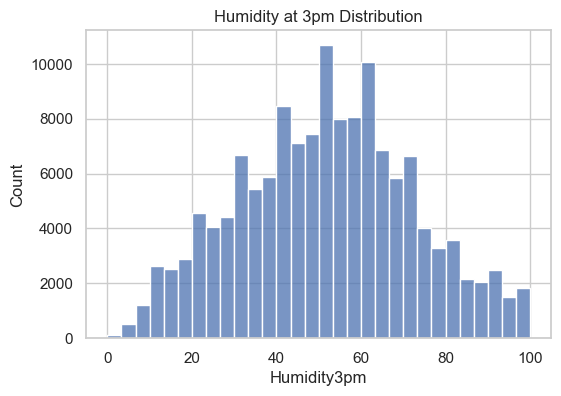

In [12]:
plt.figure(figsize=(6,4))
sns.histplot(df["Humidity3pm"], bins=30)
plt.title("Humidity at 3pm Distribution")
plt.show()


The distribution of **Humidity3pm** is slightly right-skewed, with most values
concentrated between 40% and 70%. The presence of extreme values supports the
use of median imputation and feature scaling.


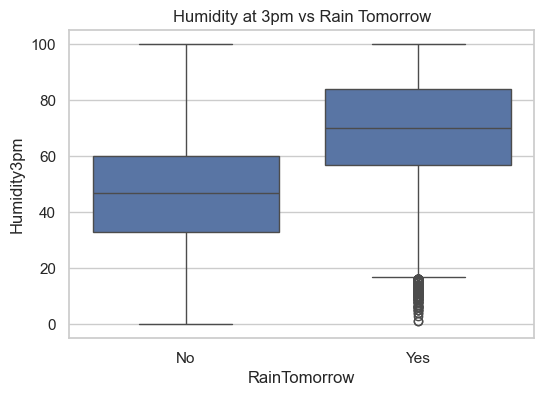

In [13]:
plt.figure(figsize=(6,4))
sns.boxplot(x="RainTomorrow", y="Humidity3pm", data =df)
plt.title("Humidity at 3pm vs Rain Tomorrow")
plt.show()

Humidity levels at 3pm are noticeably higher on days preceding rainfall.
This separation indicates that **Humidity3pm** is a strong predictor
for the target variable.


In [16]:
pd.crosstab(df["RainToday"], df["RainTomorrow"])


RainTomorrow,No,Yes
RainToday,,
No,92728,16604
Yes,16858,14597


In [17]:
pd.crosstab(df["RainToday"], df["RainTomorrow"], normalize="index")


RainTomorrow,No,Yes
RainToday,,
No,0.848132,0.151868
Yes,0.535940,0.464060


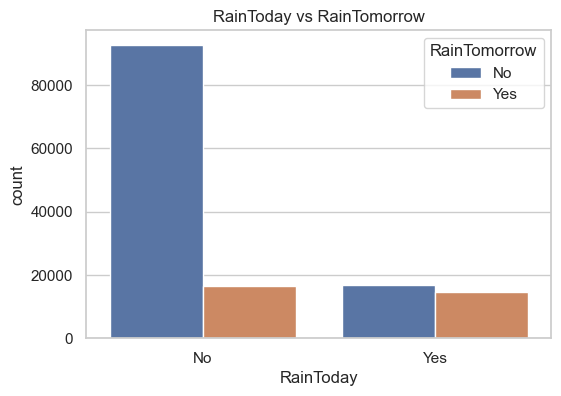

In [18]:
plt.figure(figsize=(6,4))
sns.countplot(x="RainToday", hue="RainTomorrow", data=df)
plt.title("RainToday vs RainTomorrow")
plt.show()


Days with rainfall today show a significantly higher probability of rainfall
on the following day. This strong dependency indicates that **RainToday**
is one of the most informative categorical features for predicting rainfall.


## 📊 Exploratory Data Analysis Summary

- The target variable **RainTomorrow** is significantly imbalanced, with far more non-rainy days than rainy days.
  This confirms that accuracy alone is not a reliable evaluation metric and motivates the use of F1-score and recall.

- Several numerical features (e.g., **Rainfall**, **Humidity3pm**) exhibit skewed distributions and contain extreme values.
  As a result, median imputation was preferred over mean imputation due to its robustness to outliers.

- The **Humidity3pm** feature shows a clear separation between rainy and non-rainy days.
  Higher humidity levels in the afternoon are strongly associated with rainfall on the following day,
  indicating that this feature carries strong predictive information.

- Categorical analysis reveals a strong dependency between **RainToday** and **RainTomorrow**.
  Days with rainfall today have a significantly higher probability of rainfall on the next day,
  making **RainToday** one of the most informative categorical features.

- These findings justify the preprocessing choices used in the modeling pipeline,
  including median imputation, feature scaling, and one-hot encoding for categorical variables.

- Overall, the exploratory analysis confirms that the dataset contains meaningful signals
  for rainfall prediction and provides a solid foundation for baseline modeling.
